# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Employee Retention Prediction</p>

<img src="https://businessjargons.com/wp-content/uploads/2022/04/employee-retention1.jpg" width="1800">

<div style="border-radius:10px; padding: 15px; background-color:#F9E6CF; font-size:120%; text-align:left">

<h3 align="left"><font color=brown>Problem:</font></h3>

In this project, we use a dataset with details about data scientists, including their background, work experience, education, company size, training hours, and more. Our goal is to build a model that can predict which data scientists might be looking for a new job. Because losing good employees can be very costly, we focus on making sure our model catches as many potential job seekers as possible. This means that having a high recall (finding most of the job changers) is very important.


<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Objectives:</font></h3>



* __Explore the Dataset__: Analyze the structure and distribution of features in both aug_train.csv and aug_test.csv to understand employee retention patterns.
  
* __Conduct Extensive Exploratory Data Analysis (EDA):__
   - Investigate feature distributions and relationships with the target variable.
   - Analyze missing values and potential correlations.
   - Perform statistical analysis to identify key factors influencing employee retention.

* __Data Preprocessing:__
   - Handle missing values to maintain data integrity.
   - Encode categorical variables for model compatibility.
   - Scale numerical features where necessary for better model performance.
   - Address class imbalance to improve prediction accuracy, especially for employees looking for a job change (class 1).
  
* __Train-Validation-Test Split:__
   - Split aug_train.csv into training and validation sets for model training.
   - Use aug_test.csv as unseen test data for final predictions.
  
*  __Model Building & Optimization:__
   - Implement and fine-tune classification models, including Logistic Regression, Random Forest, XGBoost, and LightGBM.
   - Establish proper feature selection and engineering strategies.
   - Focus on improving recall for class 1 to accurately identify employees likely to leave.
     
* __Model Evaluation & Performance Comparison:__
   - Evaluate models using accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices.
   - Compare different models and select the best-performing one for predictions.
    
* __Final Prediction & Submission:__
   - Use the best-trained model to predict employee retention on aug_test.csv.
   - Save the predictions in the required format for further analysis or business decision-making

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Table of Contents:</font></h3>
    
* __Step 1 |__ Import Libraries
 
* __Step 2 |__ Read Dataset
 
* __Step 3 |__ Dataset Overview
  
    - __Step 3.1 |__ Dataset Basic Information
      
    - __Step 3.2 |__ Distribution of Target Variable no Training Data
 
    - __Step 3.3 |__ Summary Statistics for Train and Test Data
 
* __Step 4 |__ EDA

    - __Step 4.1 |__ Univariate Analysis
      
        - __Step 4.1.1 |__ Univariate Analysis of Numerical Variables
          
        - __Step 4.1.2 |__  Univariate Analysis of Categorical Variables
          
    - __Step 4.2 |__ Bivariate Analysis
 
        - __Step 4.2.1 |__ Numerical Features vs Target
          
        - __Step 4.2.2 |__ Categorical Features vs Target
          
    - __step 4.3 |__ Multivariate Analysis of Numerical Variable
 
* __Step 5 |__ Data Preprocessing

    - __Step 5.1 |__ Removing Unnecessary Features
  
    - __Step 5.2 |__ Imputing Missing Value
 
        - __Step 5.2.1 |__ Imputing Missing Values for Numerical Variabels
          
        - __step 5.2.2 |__ Imputing Missing Values For Categorical Features
     
    - __Step 5.3 |__ Encoding Features for Model Training
 
    - __step 5.4 |__ Handling Class-Imbalance With SMOTE
 
    - __Step 5.5 |__ Feature Scaling
    
* __Step 6 |__ Building a Logistic Regression Model

    - __Step 6.1 |__ Define the Logistic Regression Base Model
  
    - __Step 6.2 |__ Model Evaluation
 
* __Step 7 |__ Building a Random Forest Model

    - __Step 7.1 |__ Define the Random Forest Base Model
 
    - __Step 7.2 |__ Model Evaluation

* __Step 8 |__ Building XGBoost Model

    - __Step 8.1 |__ Define the XGBoost Base model
 
    - __Step 8.2 |__ Model Evaluation
 
* __Step 9 |__ Building LightGBM Model

    - __Step 9.1 |__ Define the LightGBM Base Model
 
    - __Step 9.2 |__ Model Evaluation
 
* __Step 10 |__ Model Comparision

* __Step 11 |__ Feature Impoertance

* __Step 12 |__ Prediction

   - __12.1 |__ Distribution of Target Variable on Test Data

* __Step 13 |__ Conclusion  
  

<a id="import"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings("ignore")


<a id="read"></a>
# <p style="background-color:#F9E6CF ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

<div style="border-radius:10px; padding:15px; background-color: #F9E6CF;font-size:200%; text-align:left">

 load the dataset:

In [5]:
train=pd.read_csv(r"C:\Users\DELL\Desktop\erp\aug_train.csv")
test=pd.read_csv(r"C:\Users\DELL\Desktop\erp\aug_test.csv")

In [7]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:120%; text-align:left">

<h2 align="left"><font color=brown>Dataset Description:</font></h2>

* __enrollee_id__ : Unique ID for enrollee

* __city__: City code

* __citydevelopmentindex__: Developement index of the city (scaled)

* __gender__: Gender of enrolee

* __relevent_experience__: Relevent experience of enrolee

* __enrolled_university__: Type of University course enrolled if any

* __education_level__: Education level of enrolee

* __major_discipline__ :Education major discipline of enrolee

* __experience__: Enrolee total experience in years

* __company_size__: No of employees in current employer's company

* __company_type__ : Type of current employer

* __lastnewjob__: Difference in years between previous job and current job

* __training_hours__: training hours completed

* __target__: 0 – Not looking for job change, 1 – Looking for a job change

In [11]:
train['target'] = train['target'].astype(int)

print(train['target'].unique())  # Should print: [0, 1]
print(train['target'].dtype)  # Should print: int64

[1 0]
int32


<div style="border-radius:10px; padding: 15px; background-color:#F9E6CF; font-size:115%; text-align:left">

<h2 align="left"><font color=brown>Conclusion:</font></h2>

This code converts the target column to integers so that it only contains 0s and 1s. Then, it prints out the unique values and the data type to make sure the conversion worked correctly.

<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 3.2 |</span><span style='color:brown'>Distribution Target Variable on Train Data</span></b>

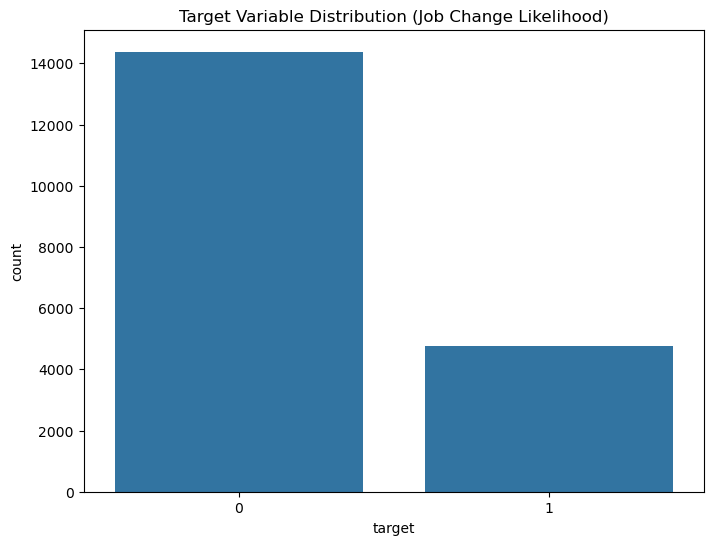

target
0    14381
1     4777
Name: count, dtype: int64

In [13]:
# Target class distribution
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train)
plt.title('Target Variable Distribution (Job Change Likelihood)')
plt.show()

# Percentage breakdown
train['target'].value_counts()

<div style="border-radius:10px; padding: 15px; background-color:#F9E6CF; font-size:115%; text-align:left">

<h2 align="left"><font color=brown>Conclusion:</font></h2>

0=14381
1=4777
This bar chart shows that most employees are labeled as "0" indicating they’re not likely to change jobs, and fewer are labeled as “1” indicating they’re  likely to change jobs.

<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 3.3 |</span><span style='color:brown'>Summary Statistics for Train and Test Data</span></b>

In [193]:
train.describe()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,44.193914,0.828848,0.945349,0.280092,1.545255,0.689686,4.717768,10.096409,1563.576052,4.489560,1.978338,65.366896,0.249348
std,9616.292592,35.464009,0.123362,0.267595,0.449056,0.800123,0.995951,0.950982,6.765820,3197.127026,1.297027,1.663502,60.058462,0.432647
min,1.000000,0.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,8554.250000,5.000000,0.740000,1.000000,0.000000,1.000000,0.000000,5.000000,4.000000,75.000000,5.000000,1.000000,23.000000,0.000000
50%,16982.500000,48.000000,0.903000,1.000000,0.000000,2.000000,0.000000,5.000000,9.000000,75.000000,5.000000,1.000000,47.000000,0.000000
75%,25169.750000,64.000000,0.920000,1.000000,1.000000,2.000000,2.000000,5.000000,16.000000,300.000000,5.000000,3.000000,88.000000,0.000000
max,33380.000000,122.000000,0.949000,2.000000,1.000000,2.000000,4.000000,5.000000,21.000000,10000.000000,5.000000,5.000000,336.000000,1.000000


<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">
  
<h3 align="left"><font color=brown>Conclusion:</font></h3>



* __city_development_index__: The average city development index is approximately 0.8288, with values ranging from 0.448 to 0.949.
  
* __training_hours__: The average training hours completed is approximately 65.37, with a minimum of 1 and a maximum of 336 hours.

* __target__: The proportion of individuals looking for a job change is around 0.249.  

</div>

In [195]:
test.describe()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,16861.614843,38.001409,0.824984,0.946923,0.284171,1.523720,0.713950,4.738375,10.102395,1542.797088,4.519493,1.995303,64.983091
std,9576.846029,29.908829,0.125074,0.269888,0.451125,0.811412,1.012793,0.898849,6.859207,3173.828829,1.252336,1.642646,60.238660
min,3.000000,0.000000,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000
25%,8562.000000,5.000000,0.698000,1.000000,0.000000,1.000000,0.000000,5.000000,4.000000,75.000000,5.000000,1.000000,23.000000
50%,16816.000000,41.000000,0.903000,1.000000,0.000000,2.000000,0.000000,5.000000,9.000000,75.000000,5.000000,1.000000,47.000000
75%,25129.000000,55.000000,0.920000,1.000000,1.000000,2.000000,2.000000,5.000000,16.000000,300.000000,5.000000,3.000000,86.000000
max,33353.000000,107.000000,0.949000,2.000000,1.000000,2.000000,4.000000,5.000000,21.000000,10000.000000,5.000000,5.000000,334.000000


<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">
  
<h3 align="left"><font color=brown>Conclusion:</font></h3>


  
* __city_development_index__: The average city development index is 0.825, with values between 0.448 and 0.949.

* __training_hours__: The average training hours completed is 60.24, ranging from 1 to 334 hours.
</div>

<a id="eda"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 4.1 |</span><span style='color:brown'>Univariate Analysis</span></b> 

<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 4.1.1 |</span><span style='color:brown'>Univariate Analysis of Numerical Variables</span></b> 

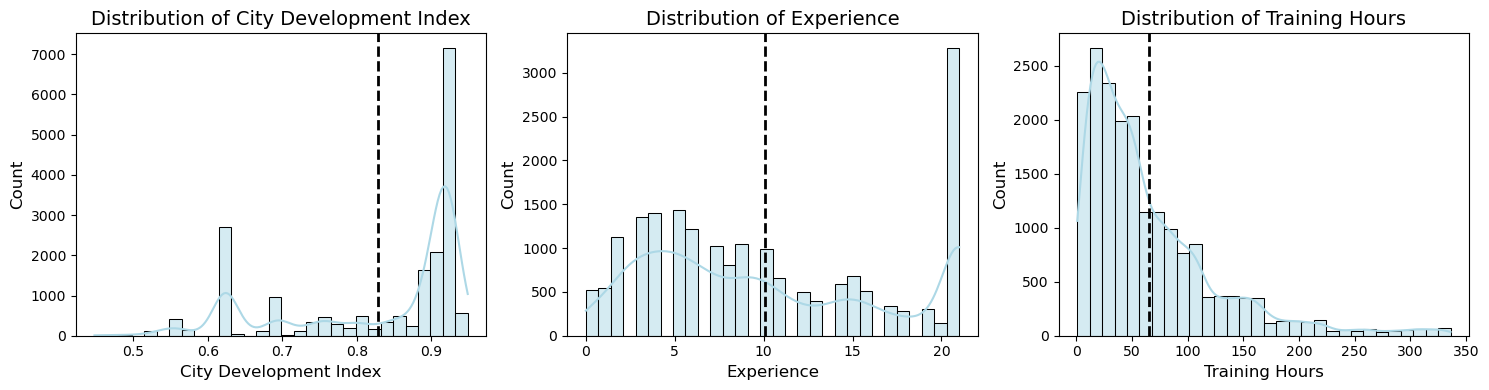

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
num_cols = ["city_development_index", "experience", "training_hours"]

# Ensure columns are numeric
for col in num_cols:
    train[col] = pd.to_numeric(train[col], errors="coerce")  # Convert non-numeric values to NaN

# Handle missing values by filling with the mean
train[num_cols] = train[num_cols].fillna(train[num_cols].mean())

# Create subplots for numerical features
plt.figure(figsize=(15, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(train[col], bins=30, kde=True, color="lightblue", edgecolor="black")

    # Add dashed vertical line for mean
    plt.axvline(train[col].mean(), color="black", linestyle="dashed", linewidth=2)

    # Set title and labels
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Remove gridlines
    plt.grid(False)

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#F9E6CF; font-size:115%; text-align:left">

<h2 align="left"><font color=brown>Conclusion:</font></h2>

* __City Development Index Distribution__
* Most employees are from highly developed cities (index around 0.9).
* Very few employees come from cities with a low development index (below 0.6).
* Employees from well-developed cities might have better job stability and growth opportunities.
  
* __Experience Distribution__
* A majority of employees have less than 15 years of experience, with a peak around 10 years.
* Employees with more than 20 years of experience are rare in the dataset.
* The higher peak at 10 years suggests that many employees switch or settle into jobs around this mark.
  
* __Training Hours Distribution__
* Most employees complete less than 50 training hours, indicating that shorter training programs are common.
* A small number of employees undergo extensive training (150+ hours), possibly for career transitions or upskilling.
* The right-skewed distribution suggests that only a few employees invest heavily in training.


<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 4.1.2 |</span><span style='color:brown'>Univariate Analysis of Categorical Features</span></b>

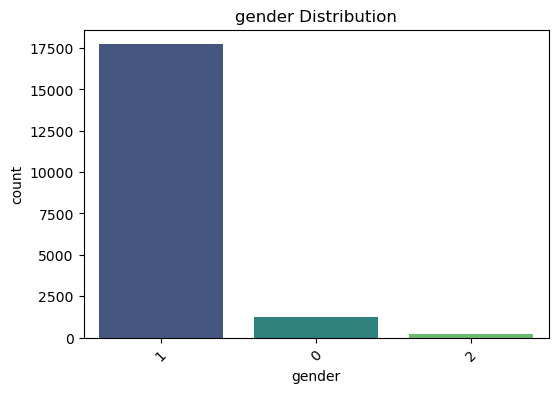

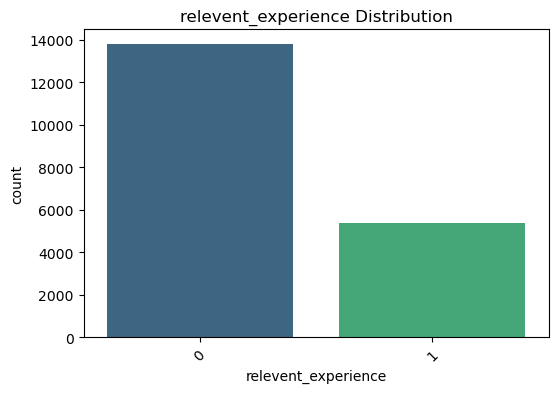

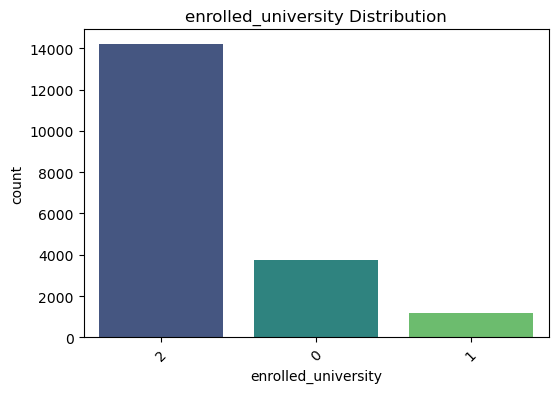

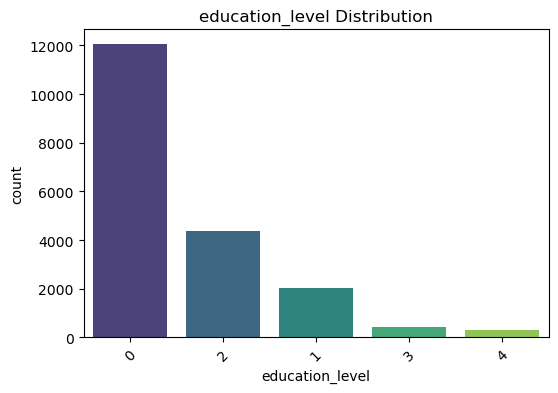

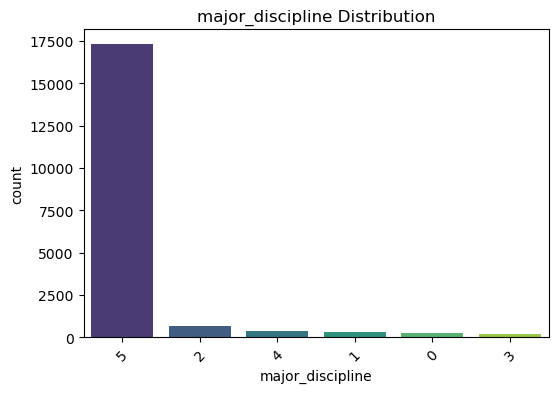

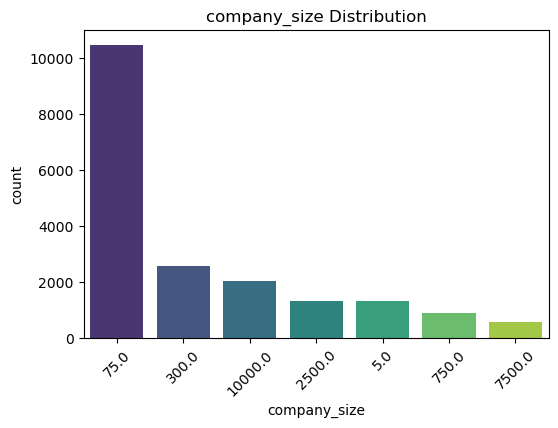

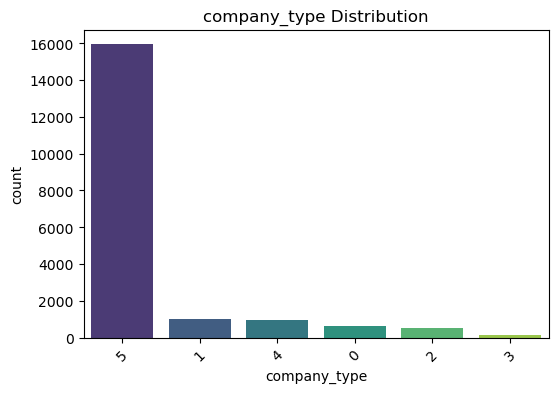

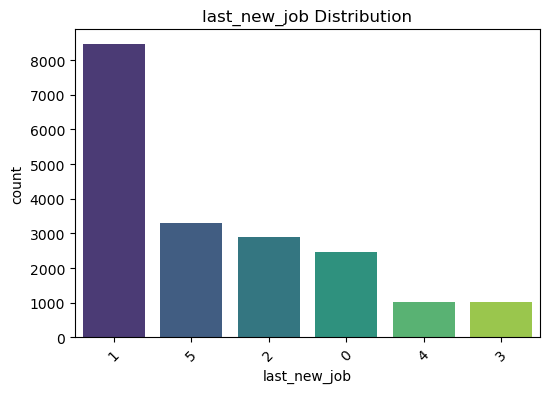

In [206]:
# Visualize categorical features
categorical_features = ['gender', 'relevent_experience', 'enrolled_university', 
                        'education_level', 'major_discipline', 'company_size', 
                        'company_type', 'last_new_job']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=train, order=train[feature].value_counts().index, palette='viridis')
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __Gender__:
Male employees form the largest group, followed by Female, and a small proportion identified as Other.

* __Relevant Experience__:
Most employees have relevant experience, indicating a workforce with prior industry background. A smaller segment has no relevant experience.

* __Enrolled University__:
A significant number of employees are not enrolled in any university course. Among those who are enrolled, full-time and part-time courses vary but form smaller portions.

* __Education Level__:
Graduate is the most common education level, followed by Masters. PhD and other levels make up a smaller share.

* __Major Discipline__:
STEM (Science, Technology, Engineering, Mathematics) dominates as the primary discipline. Other fields like Business, Arts, etc., have fewer employees.

* __Company Size__:
Mid-sized companies (e.g., “50-99” or “100-500”) have a large share of employees, though there is representation across all sizes, including very small and very large firms.

* __Company Type__:
Private Limited (Pvt Ltd) companies employ the majority, with fewer employees in public sector, NGOs, startups, and other types.

* __Last New Job__:
The distribution shows many employees changed jobs 1–2 years ago, with smaller groups for those who switched more recently or haven’t switched in a long time.

<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 4.2 |</span><span style='color:brown'>Bivariate Analysis</span></b>

<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 4.2.1 |</span><span style='color:brown'>Numerical Variable Vs Target

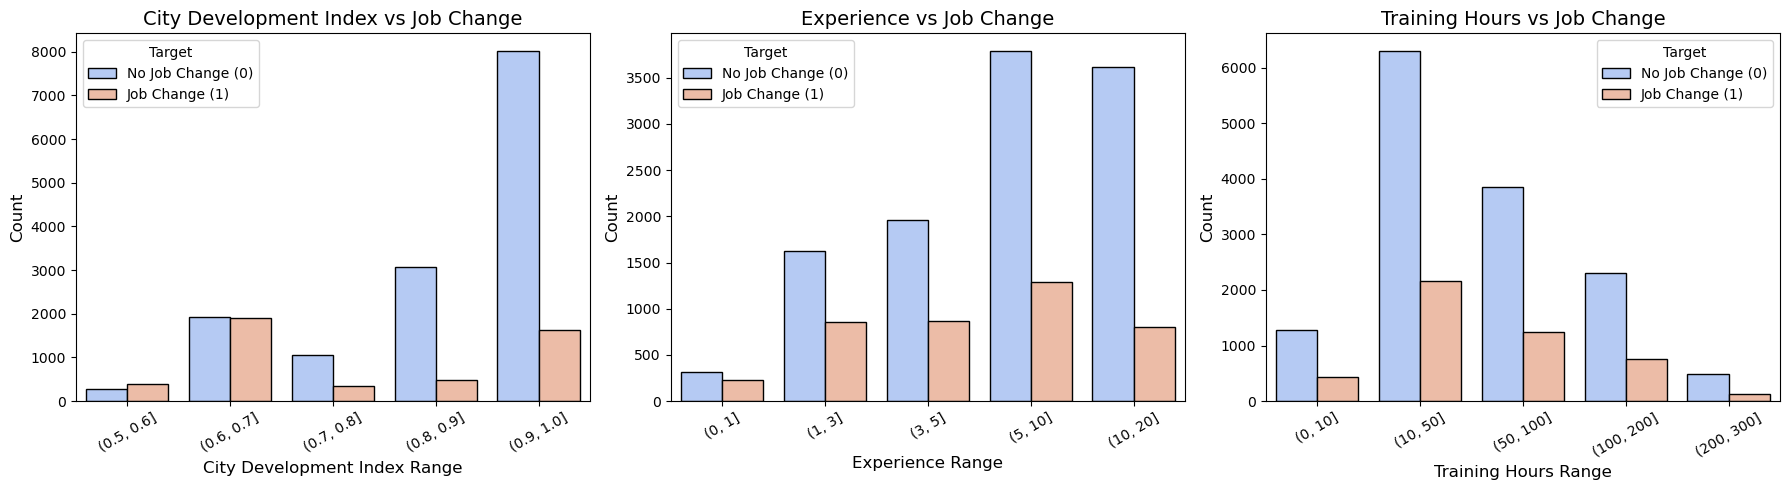

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns
num_cols = ["city_development_index", "experience", "training_hours"]

# Define bins for each numerical column
bin_ranges = {
    "city_development_index": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "experience": [0, 1, 3, 5, 10, 20],
    "training_hours": [0, 10, 50, 100, 200, 300]
}

# Create a new DataFrame with binned values
binned_data = train.copy()
for col in num_cols:
    binned_data[col + "_range"] = pd.cut(binned_data[col], bins=bin_ranges[col])

# Set figure size
plt.figure(figsize=(18, 5))

# Loop through numerical columns and plot grouped bar charts
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    
    # Countplot grouped by target
    sns.countplot(
        data=binned_data, x=col + "_range", hue="target",
        palette="coolwarm", edgecolor="black"
    )
    
    # Formatting
    plt.title(f"{col.replace('_', ' ').title()} vs Job Change", fontsize=14)
    plt.xlabel(col.replace("_", " ").title() + " Range", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=30)  # Rotate x-axis labels for better visibility
    plt.legend(title="Target", labels=["No Job Change (0)", "Job Change (1)"])

plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __City Development Index vs Job Change__
* Employees from highly developed cities (index 0.8-0.9) tend to stay in their jobs (more blue bars).
* Employees from low-development areas (index 0.5-0.6) are more likely to look for a job change (higher orange bars).
* This suggests that better infrastructure and opportunities in developed cities encourage job stability.
  
* __Experience vs Job Change__
* Employees with 1-5 years of experience are more likely to switch jobs (higher orange bars for target = 1).
* Those with more than 10 years of experience tend to stay in their jobs (majority in blue).
* This indicates that early-career employees are more likely to seek better opportunities, while experienced employees prefer stability.
  
* __Training Hours vs Job Change__
* Employees with fewer training hours (<50) are more likely to look for a new job (noticeable orange bars).
* As training hours increase, job retention improves (majority blue bars in the 100+ training hour range).
* This highlights that skill development may influence employees' decisions to stay in their current jobs.

<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 4.2.2 |</span><span style='color:brown'>Categorical Features Vs Target</span></b>

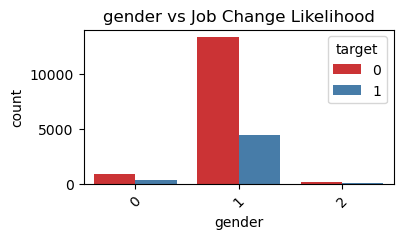

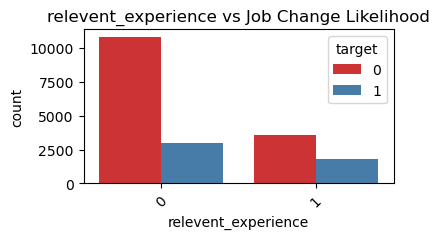

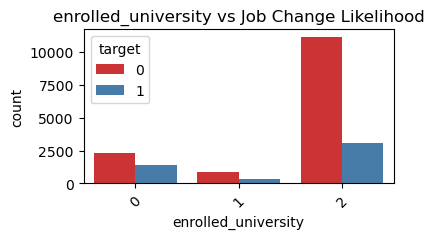

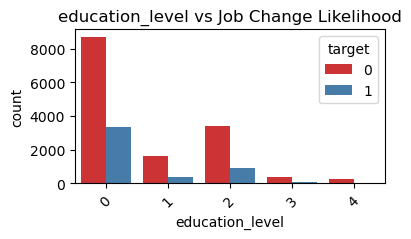

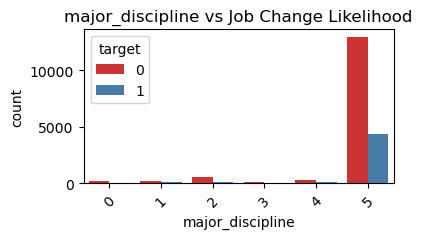

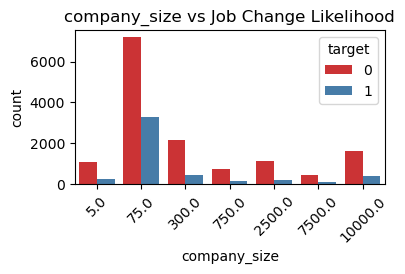

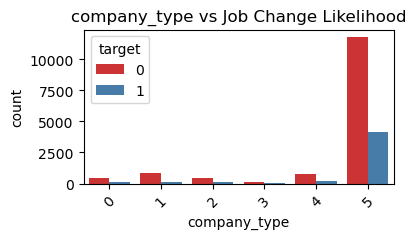

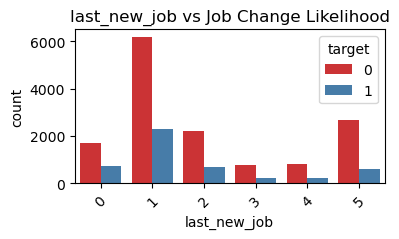

In [217]:
for feature in categorical_features:
    plt.figure(figsize=(4, 2))
    sns.countplot(x=feature, hue='target', data=train, palette='Set1')
    plt.title(f'{feature} vs Job Change Likelihood')
    plt.xticks(rotation=45)
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __Gender vs Job Change:__ More males are in the dataset, and they are more likely to stay in their jobs compared to females and others.
  
* __Relevant Experience vs Job Change:__ Employees with prior relevant experience are less likely to change jobs compared to those without experience.

* __University Enrollment vs Job Change:__ People who did not enroll in a university are more likely to stay in their jobs, while those who took full-time courses show higher job change tendencies.

* __Education Level vs Job Change:__ Graduates and master’s degree holders dominate the dataset. Higher education levels show a lower tendency for job changes.

* __Major Discipline vs Job Change:__ Most employees come from STEM (Science, Technology, Engineering, and Mathematics) backgrounds, and they are less likely to change jobs.

* __Company Size vs Job Change:__ Employees in very small companies (<10 employees) and very large companies (10,000+) are more likely to change jobs.

* __Company Type vs Job Change:__ Employees in private sector companies dominate the dataset, but startups show a higher tendency for job changes.

* __Last Job Change vs Job Change:__ Employees who have not changed jobs for many years are more likely to stay, while those with frequent job changes show a higher tendency to change jobs again.



<a id="num_uni"></a>
# <b><span style='color#F96CEF'>Step 4.3 |</span><span style='color:brown'>Multivariate Analysis of Numerical Variables</span></b>

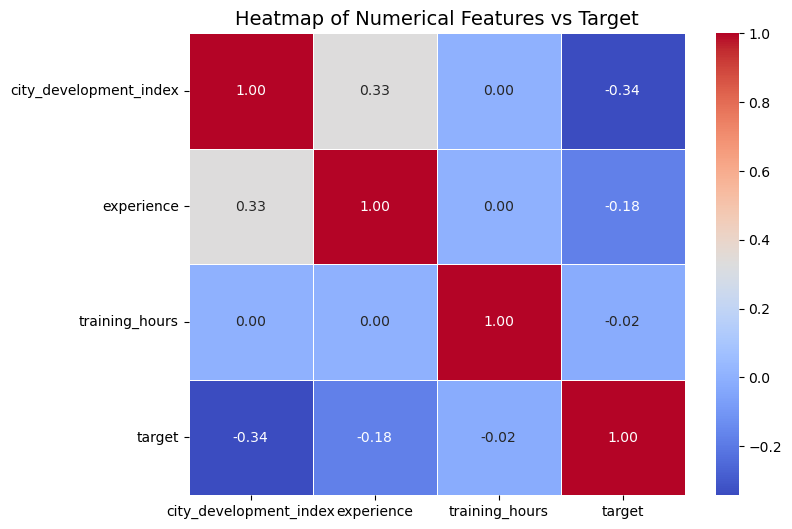

In [221]:
# Selecting numerical columns
numerical_cols = ["city_development_index", "experience", "training_hours", "target"]

# Convert 'experience' to numeric (handling '>' and '<' signs if any)
train["experience"] = pd.to_numeric(train["experience"], errors="coerce")

# Compute correlation matrix
corr_matrix = train[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Heatmap of Numerical Features vs Target", fontsize=14)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __City Development Index vs Target (-0.34)__
A negative correlation of -0.34 suggests that employees from highly developed cities are less likely to look for a job change.

* __Experience vs Target (-0.15)__
A weak negative correlation of -0.15 implies that employees with more experience are slightly less likely to switch jobs.

* __Training Hours vs Target (-0.02)__
A near-zero correlation (-0.02) indicates that training hours have minimal impact on job change behavior.

* __Overall Interpretation__
City development index has the strongest negative correlation with job switching, meaning employees from well-developed areas are less likely to look for new jobs.
Experience has a weak negative relationship, indicating that more experienced employees tend to stay longer but not significantly.
Training hours show almost no effect on job retention.






<a id="preprocessing"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

<a id="feature_removal"></a>
# <b><span style='color#F96CEF'>Step 5.1 |</span><span style='color:brown'>Removing Unnecessary Features</span></b>

In [15]:
df_train=train.drop(columns=['enrollee_id','city'],axis=1)
df_test=test.drop(columns=['enrollee_id','city'],axis=1)

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Reasons for Dropping 'enrollee_id' and 'city':</font></h3>

* The column 'enrollee_id' is irrelevant because it is just a unique identifier for each individual in the dataset and does not contribute to the prediction of employee retention.

* Non-Predictive: It does not have any meaningful relationship with the target variable (employee retention).

* Prevents Data Leakage: Including an ID column in the model might lead to overfitting if the ID pattern unintentionally captures information about the target.

* Reduces Unnecessary Complexity: Keeping non-informative columns increases computational overhead without adding value.

* The city column has many unique values, which can make it difficult for the model to handle. Since we already have city_development_index, which represents the development level of each city, keeping city might not be necessary. However, removing city could lead to losing some location-based information that might be useful for predictions, unless city_development_index already captures that information well.

<a id="missing"></a>
# <b><span style='color:F96CEF'>Step 5.2 |</span><span style='color:brown'>Imputing Missing Values</span></b>

In [17]:
train.shape,test.shape

((19158, 14), (2129, 13))

In [19]:
# checking for missing values
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [21]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

Some columns in our dataset have missing values. To keep the data accurate and avoid bias, we need to handle them properly. Imputing these missing values allows us to fill in the gaps without losing valuable data. This ensures we make the most of our dataset while maintaining consistency and accuracy in our analysis.

<a id="missing"></a>
# <b><span style='color:F96CEF'>Step 5.2.1 |</span><span style='color:brown'>Imputing Missing Values For Categorical Variables</span></b>

In [23]:
train["gender"].fillna(train["gender"].mode()[0], inplace=True)  
test["gender"].fillna(test["gender"].mode()[0], inplace=True)  

train["enrolled_university"].fillna(train["enrolled_university"].mode()[0], inplace=True)  
test["enrolled_university"].fillna(test["enrolled_university"].mode()[0], inplace=True)  

train["education_level"].fillna(train["education_level"].mode()[0], inplace=True)  
test["education_level"].fillna(test["education_level"].mode()[0], inplace=True)  

train["major_discipline"].fillna(train["major_discipline"].mode()[0], inplace=True)  
test["major_discipline"].fillna(test["major_discipline"].mode()[0], inplace=True)  

train["company_size"].fillna(train["company_size"].mode()[0], inplace=True)  
test["company_size"].fillna(test["company_size"].mode()[0], inplace=True)  

train["last_new_job"].fillna(train["last_new_job"].mode()[0], inplace=True)  
test["last_new_job"].fillna(test["last_new_job"].mode()[0], inplace=True)  

train["company_type"].fillna(train["company_type"].mode()[0], inplace=True)  
test["company_type"].fillna(test["company_type"].mode()[0], inplace=True)  


<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* The above code is performing missing value imputation for multiple categorical columns in both the training (train) and testing (test) datasets.

* Handling Missing Values:

* The mode (most frequent value) is used to fill missing values in categorical columns.
This ensures that no missing values remain, preventing issues during model training.
Why Mode Imputation?

* Since categorical data does not have a meaningful numerical average, using the mode (most common category) is a simple and effective strategy.
It prevents data loss that would occur if we removed rows with missing values.
Ensuring Data Consistency:

* By applying the same imputation strategy to both the training and testing datasets, we maintain consistency, preventing discrepancies in model predictions.

* Final Thought:
This approach ensures that missing categorical values are filled efficiently, keeping the dataset complete and ready for encoding and model training. 

<a id="missing"></a>
# <b><span style='color:F96CEF'>Step 5.2.2|</span><span style='color:brown'>Imputing Missing Values For Numerical Values</span></b>

<a id="missing"></a>
# <b><span style='color:F96CEF'> |</span><span style='color:brown'>Converts experience column to numerical format:</span></b>

In [25]:
def convert_experience(value):
    if value=="<1":
        return 0
    elif value==">20":
        return 21
    elif pd.isna(value):
        return None
    else:
        return int(value)

train["experience"]=train["experience"].apply(convert_experience)
test["experience"]=test["experience"].apply(convert_experience)

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>


* "<1" is converted to 0, representing less than one year.

* ">20" is converted to 21, representing more than 20 years.

* NaN values are kept as None to handle missing data.

* Other numeric values are converted to integers for consistency.


In [27]:
train["experience"].fillna(train["experience"].median(),inplace=True)
test["experience"].fillna(test["experience"].median(),inplace=True)


# <b><span style='color:F96CEF'> |</span><span style='color:brown'>Converts company_size column to numerical format:</span></b>

In [32]:
def convert_company_size(size):
    if pd.isna(size):
        return np.nan
    elif size == '<10':
        return 5
    elif size == '10-49':
        return 30
    elif size == '50-99':
        return 75
    elif size == '100-500':
        return 300
    elif size == '500-999':
        return  750
    elif size == '1000-4999':
        return 2500
    elif size == '5000-9999':
        return 7500
    elif size == '10000+':
        return 10000
    else:
        return np.nan

train['company_size']=train['company_size'].apply(convert_company_size)
test['company_size']=test['company_size'].apply(convert_company_size)    

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>


* The company_size column is converted into numerical values for better analysis.
                                                          
* Each category is replaced with an approximate midpoint value to represent company size.
    
* Missing values (NaN) remain unchanged to avoid data distortion.
    
* This transformation helps machine learning models interpret company size more effectively.
    
* The converted values allow for meaningful comparisons and visualizations.

In [ ]:
train["company_size"].fillna(train["company_size"].median(),inplace=True)
test["company_size"].fillna(test["company_size"].median(),inplace=True)

<a id="encoding"></a>
# <b><span style='color:F96CEF'>Step 5.3|</span><span style='color:brown'>Encoding Features for Model Training</span></b>

In [36]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [38]:
train['relevent_experience']=encode.fit_transform(train['relevent_experience'])
test['relevent_experience']=encode.fit_transform(test['relevent_experience'])


In [40]:
train['education_level']=encode.fit_transform(train['education_level'])
test['education_level']=encode.fit_transform(test['education_level'])

# <b><span style='color:F96CEF'>Step 5.4.1|</span><span style='color:brown'>Mapping last_new_job to Numerical Values</span></b>

In [42]:
mapping = {
    'never': 0,  # No previous job
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '>4': 5  # More than 4 years
}

train['last_new_job'] = train['last_new_job'].replace(mapping).astype(int)
test['last_new_job'] = test['last_new_job'].replace(mapping).astype(int)



<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>


* The last_new_job feature, originally in categorical format, has been converted into numerical values.
    
* This mapping allows the model to understand job change frequency in a structured way.
    
* Assigning 0 to "never" and 5 to ">4" ensures a clear progression of job changes.

* Converting these values makes comparisons easier and improves model accuracy.

In [44]:
train['gender']=encode.fit_transform(train['gender'])
test['gender']=encode.fit_transform(test['gender'])

In [46]:
train['city']=encode.fit_transform(train['city'])
test['city']=encode.fit_transform(test['city'])

In [48]:
train.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [50]:
train['enrolled_university']=encode.fit_transform(train['enrolled_university'])
test['enrolled_university']=encode.fit_transform(test['enrolled_university'])


In [52]:
train['major_discipline']=encode.fit_transform(train['major_discipline'])
test['major_discipline']=encode.fit_transform(test['major_discipline'])


In [54]:
train['company_type']=encode.fit_transform(train['company_type'])
test['company_type']=encode.fit_transform(test['company_type'])


In [ ]:
# After Encoding
train.head()

In [ ]:
#after Encoding
test.head()

In [ ]:
train.isnull().sum()

In [56]:
# Seperate feature and target for training set
X= train.drop(columns=['target'])
y=train['target'] # The target variable

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

    
X contains all columns except the target variable, representing the independent features used for model training.
y represents the target variable (target), which the model aims to predict.


# <b><span style='color:F96CEF'>Step 5.5|</span><span style='color:brown'>Handling Class Imbalance with SMOTE</span></b>

In [58]:
# Handle class imbalance with SMOTE
smote= SMOTE(random_state=42)
X_resampled, y_resampled= smote.fit_resample(X,y)

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

    
* SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset by generating synthetic samples for the minority class.
                                                                                                                 
* This helps prevent bias in the model, ensuring it does not favor the majority class.
                                                                                                                 
* X_resampled contains the new balanced feature set, while y_resampled holds the corresponding target values.

* The resampled dataset now has an equal distribution of both classes, improving model performance and fairness.

In [60]:
# Split traing dataset into training set and validation set
X_train, X_val, y_train, y_val= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* X_train and y_train: These represent the training features and target variable, respectively, used to train the model.

* X_val and y_val: These represent the validation features and target variable, respectively, used to evaluate the model’s performance.
    
* The test data (aug_test.csv) should only be used for final model evaluation.
    
* If we train directly on aug_train.csv without validation, we won’t know how well the model generalizes before testing.
    
* A validation set helps tune hyperparameters and detect overfitting.

<a id="encoding"></a>
# <b><span style='color:F96CEF'>Step 5.6|</span><span style='color:brown'>Feature Scaling</span></b>

In [62]:
# Scale features
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_val_scaled= scaler.transform(X_val)
X_test_scaled= scaler.transform(test)

<a id="preprocessing"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6| Building a Logistic Regression Model

<a id="encoding"></a>
# <b><span style='color:F96CEF'>Step 6.1|</span><span style='color:brown'>Defining the Logistic Regression Base Model</span></b>

In [64]:
# Define the base model definition
log_reg= LogisticRegression(random_state=42)

In [66]:
# Train the model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [68]:
# Make predictions on the validation set
y_pred = log_reg.predict(X_val_scaled)

In [70]:
y_pred_prob=log_reg.predict_proba(X_val_scaled)[:,1]

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score1=roc_auc_score(y_val,y_pred_prob)
fpr,tpr,_= roc_curve(y_val,y_pred_prob)

In [74]:
roc_auc_score1

0.7890030422085283

<a id="encoding"></a>
# <b><span style='color:F96CEF'>Step 6.2|</span><span style='color:brown'>Model Evaluation</span></b>

In [76]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.7291847731618286


In [78]:
class_report=classification_report(y_val, y_pred)
print("classification Report")
print(class_report)

classification Report
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2877
           1       0.74      0.71      0.72      2876

    accuracy                           0.73      5753
   macro avg       0.73      0.73      0.73      5753
weighted avg       0.73      0.73      0.73      5753



<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __Class 0 (Not Looking for Job Change):__
  
* __Precision (0.72):__ When the model predicts "Not Looking for a Job Change" (0), it is correct 72% of the time
   
* __Recall (0.75):__ Out of all actual "Not Looking" instances, the model correctly identifies 75% of them.

* __F1-Score (0.74):__ A balance between precision and recall, indicating the overall effectiveness of the model for Class 0.

* __Support (2877):__ The number of actual instances of Class 0 in the dataset.


* __Class 1 (Looking for Job Change):__

* __Precision (0.74):__ When the model predicts "Looking for a Job Change" (1), it is correct 74% of the time.

* __Recall (0.71):__ Out of all actual "Looking" cases, the model correctly identifies 71% of them.

* __F1-Score (0.72):__ A balance between precision and recall, showing how well the model performs for Class 1.

* __Support (2876):__ The number of actual instances of Class 1 in the dataset.

* __Overall Performance Analysis:__

* __Accuracy (73%):__ The model correctly classifies 73% of all employees.
* __Macro Average (0.73):__ The unweighted average of precision, recall, and F1-score across both classes.
* __Weighted Average (0.73):__ Takes into account the number of instances in each class to provide a balanced metric.
                              


In [80]:
## confusion matrix
from sklearn.metrics import confusion_matrix

In [82]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[2161  716]
 [ 842 2034]]


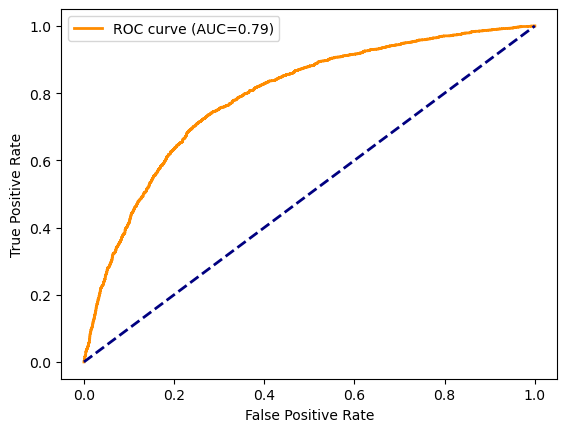

In [84]:
# plot for roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC={roc_auc_score1:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* The AUC value of 0.79 indicates that the model has moderate to good classification ability.
* An AUC of 0.5 represents a random classifier, while AUC = 1 represents a perfect classifier.
* Since 0.79 is closer to 1, the model performs significantly better than random guessing.
  
* __True Positive Rate vs. False Positive Rate:__
* The orange ROC curve is well above the diagonal baseline (dashed blue line), showing that the model successfully distinguishes between employees who will stay vs. those who will leave.
* A higher True Positive Rate (TPR) with a lower False Positive Rate (FPR) means better predictive performance.

<a id="preprocessing"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7| Building a Random Forest Model

# <b><span style='color:F96CEF'>Step 7.1|</span><span style='color:brown'>Defining the Random Forest Base Model</span></b>

In [86]:
## RandomForest model
rf_model= RandomForestClassifier(random_state=42)

In [88]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# Make predictions on the validation set
y_pred = rf_model.predict(X_val_scaled)

In [92]:
y_pred_prob1=rf_model.predict_proba(X_val_scaled)[:,1]

In [94]:
from sklearn.metrics import roc_auc_score
roc_auc_score2=roc_auc_score(y_val,y_pred_prob1)
fpr,tpr,_=roc_curve(y_val,y_pred_prob1)

In [96]:
roc_auc_score2

0.9026744653172275

<a id="encoding"></a>
# <b><span style='color:F96CEF'>Step 7.2|</span><span style='color:brown'>Model Evaluation</span></b>

In [98]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8228750217277941


In [100]:
## classification report
from sklearn.metrics import classification_report

In [102]:
class_report=classification_report(y_val, y_pred)
print("classification Report")
print(class_report)

classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2877
           1       0.83      0.82      0.82      2876

    accuracy                           0.82      5753
   macro avg       0.82      0.82      0.82      5753
weighted avg       0.82      0.82      0.82      5753



<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __Class 0 (Not Looking for Job Change):__

* __Precision (0.82):__ When the model predicts "Not Looking for a Job Change" (0), it is correct 82% of the time.
    
* __Recall (0.83):__ Out of all actual "Not Looking" instances, the model correctly identifies 83% of them.
    
* __F1-Score (0.82):__ A balance between precision and recall, indicating the overall effectiveness of the model for Class 0.
  
* __Support (2877):__ The number of actual instances of Class 0 in the dataset.

* __Class 1 (Looking for Job Change):__

* __Precision (0.83):__ When the model predicts "Looking for a Job Change" (1), it is correct 83% of the time.

* __Recall (0.82):__ Out of all actual "Looking" cases, the model correctly identifies 82% of them.

* __F1-Score (0.82):__ A balance between precision and recall, showing how well the model performs for Class 1.

* __Support (2876):__ The number of actual instances of Class 1 in the dataset.

* __Overall Performance Analysis:__

* __Accuracy (82%):__ The model correctly classifies 82% of all employees.
* __Macro Average (0.82):__ The unweighted average of precision, recall, and F1-score across both classes.
* __Weighted Average (0.82):__ Takes into account the number of instances in each class to provide a balanced metric.

In [104]:
## confusion matrix
from sklearn.metrics import confusion_matrix

In [106]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[2384  493]
 [ 526 2350]]


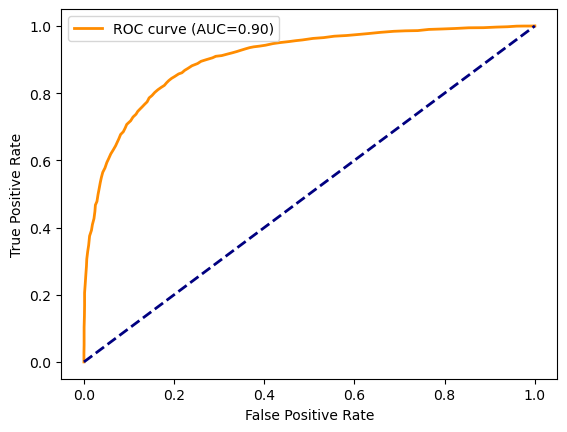

In [108]:
# plot for roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC={roc_auc_score2:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* The AUC value of 0.90 indicates that the model has strong classification ability.
* An AUC of 0.5 represents a random classifier, while AUC = 1 represents a perfect classifier.
* Since 0.90 is much closer to 1, the model performs significantly better than random guessing and has high discriminatory power.
  
* __True Positive Rate vs. False Positive Rate:__
* The orange ROC curve is well above the diagonal baseline (dashed blue line), showing that the model can successfully distinguish between employees who will stay vs. those who will leave.
* A higher True Positive Rate (TPR) with a lower False Positive Rate (FPR) means the model has strong predictive performance.


<a id="preprocessing"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8| Building a XGBoost Model

# <b><span style='color:F96CEF'>Step 8.1|</span><span style='color:brown'>Defining the XGBoost Base Model</span></b>

In [110]:
## XGBoost model
xgb_model=XGBClassifier(random_state=42)

In [112]:
# Train the model
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [114]:
# Make predictions on the validation set
y_pred = xgb_model.predict(X_val_scaled)

In [116]:
y_pred_prob2=xgb_model.predict_proba(X_val_scaled)[:,1]

In [118]:
from sklearn.metrics import roc_auc_score
roc_auc_score3=roc_auc_score(y_val,y_pred_prob2)
fpr,tpr,_=roc_curve(y_val,y_pred_prob2)

In [120]:
roc_auc_score3

0.9195214866552288

# <b><span style='color:F96CEF'>Step 8.2|</span><span style='color:brown'>Model Evaluation</span></b>

In [122]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8439075265079089


In [124]:
## classification report
from sklearn.metrics import classification_report

In [126]:
class_report=classification_report(y_val, y_pred)
print("classification Report")
print(class_report)

classification Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2877
           1       0.86      0.82      0.84      2876

    accuracy                           0.84      5753
   macro avg       0.84      0.84      0.84      5753
weighted avg       0.84      0.84      0.84      5753



<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __Class 0 (Not Looking for Job Change):__

* __Precision (0.83):__ When the model predicts "Not Looking for a Job Change" (0), it is correct 83% of the time.
    
* __Recall (0.86):__ Out of all actual "Not Looking" instances, the model correctly identifies 86% of them.
    
* __F1-Score (0.85):__ A balance between precision and recall, indicating strong predictive ability for Class 0.
                                                                                                   
* __Support (2877):__ The number of actual instances of Class 0 in the dataset.
    
* __Class 1 (Looking for Job Change):__

* __Precision (0.86):__ When the model predicts "Looking for a Job Change" (1), it is correct 86% of the time.
    
* __Recall (0.82):__ Out of all actual "Looking" cases, the model correctly identifies 82% of them.
    
* __F1-Score (0.84):__ A balance between precision and recall, showing strong predictive ability for Class 1.
                                                                                                
* __Support (2876):__ The number of actual instances of Class 1 in the dataset.
    
* __Overall Performance Analysis:__

* __Accuracy (84%):__ The model correctly classifies 84% of all employees.
    
* __Macro Average (0.84):__ The unweighted average of precision, recall, and F1-score across both classes.
    
* __Weighted Average (0.84):__ Takes into account the number of instances in each class to provide a balanced metric.

In [128]:
## confusion matrix
from sklearn.metrics import confusion_matrix

In [130]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[2485  392]
 [ 506 2370]]


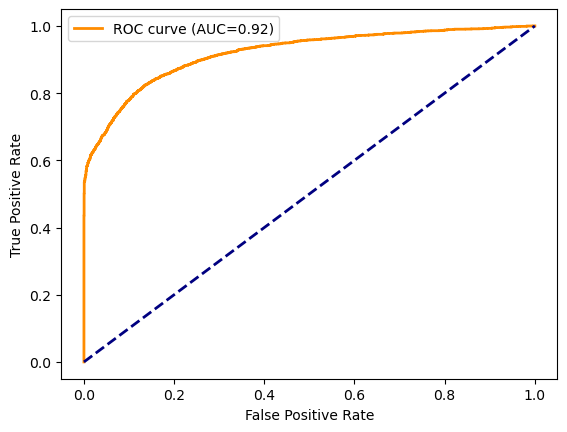

In [132]:
# plot for roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC={roc_auc_score3:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* The AUC value of 0.92 indicates that the model has excellent classification ability.
* An AUC of 0.5 represents a random classifier, while AUC = 1 represents a perfect classifier.
* Since 0.92 is very close to 1, the model performs significantly better than random guessing.

* __True Positive Rate vs. False Positive Rate:__
  
* The orange ROC curve is well above the diagonal baseline (dashed blue line), indicating that the model effectively distinguishes between employees who will stay vs. those who will leave.
* A higher True Positive Rate (TPR) with a lower False Positive Rate (FPR) signifies better predictive performance.

# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9| Building a LightGBM Model

<a id="encoding"></a>
# <b><span style='color:F96CEF'>Step 9.1|</span><span style='color:brown'>Defining the XGBoost Base Model</span></b>

In [134]:
## LIGHTGBM model
lgbm_model= LGBMClassifier(random_state=42)

In [136]:
# Train the model
lgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 11505, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 23009, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500022 -> initscore=0.000087
[LightGBM] [Info] Start training from score 0.000087


LGBMClassifier(random_state=42)

In [138]:
# Make predictions on the validation set
y_pred = lgbm_model.predict(X_val_scaled)

In [140]:
y_pred_prob3=lgbm_model.predict_proba(X_val_scaled)[:,1]

In [142]:
from sklearn.metrics import roc_auc_score
roc_auc_score4=roc_auc_score(y_val,y_pred_prob3)
fpr,tpr,_=roc_curve(y_val,y_pred_prob3)

In [144]:
roc_auc_score4

0.9217515371782246

<a id="encoding"></a>
# <b><span style='color:F96CEF'>Step 9.2|</span><span style='color:brown'>Model Evaluation</span></b>

In [146]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8446028159221276


In [148]:
## classification report
from sklearn.metrics import classification_report

In [285]:
class_report=classification_report(y_val, y_pred)
print("classification Report")
print(class_report)

classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2877
           1       0.86      0.82      0.84      2876

    accuracy                           0.84      5753
   macro avg       0.85      0.84      0.84      5753
weighted avg       0.85      0.84      0.84      5753



<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* __Class 0 (Not Looking for Job Change):__

* __Precision (0.83):__ When the model predicts "Not Looking for a Job Change" (0), it is correct 83% of the time.
    
* __Recall (0.87):__ Out of all actual "Not Looking" instances, the model correctly identifies 87% of them.
    
* __F1-Score (0.85):__ A balance between precision and recall, indicating strong predictive ability for Class 0.
                                                                                                   
* __Support (2877):__ The number of actual instances of Class 0 in the dataset.
    
* __Class 1 (Looking for Job Change):__

* __Precision (0.86):__ When the model predicts "Looking for a Job Change" (1), it is correct 86% of the time.
    
* __Recall (0.82):__ Out of all actual "Looking" cases, the model correctly identifies 82% of them.
    
* __F1-Score (0.84):__ A balance between precision and recall, showing strong predictive ability for Class 1.
                                                                                                
* __Support (2876):__ The number of actual instances of Class 1 in the dataset.
    
* __Overall Performance Analysis:__

* __Accuracy (84%):__ The model correctly classifies 84% of all employees.
* __Macro Average (0.85):__ The unweighted average of precision, recall, and F1-score across both classes, showing balanced performance.
* __Weighted Average (0.84):__ Adjusts for class imbalance, ensuring the overall model performance is consistent across different class distributions.

In [152]:
cm = confusion_matrix(y_val, y_pred)
print(cm)

[[2489  388]
 [ 506 2370]]


In [150]:
## confusion matrix
from sklearn.metrics import confusion_matrix

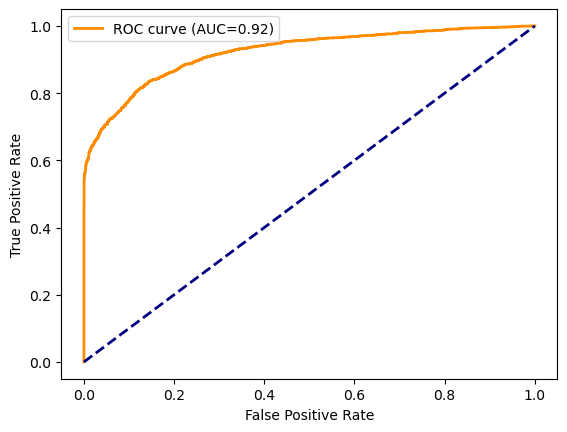

In [154]:
# plot for roc_auc
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC={roc_auc_score3:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

 <div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* The Receiver Operating Characteristic (ROC) curve evaluates the trade-off between the True Positive Rate (Recall) and the False Positive Rate across different classification thresholds.
  
* The orange curve represents the model's performance, while the blue dashed line represents a random classifier (AUC = 0.5).

* The AUC (Area Under the Curve) = 0.92, indicating high discriminative power—the model is 92% effective in distinguishing between employees looking for a job change and those who are not.

* A higher AUC value suggests a better-performing model, as it correctly ranks positive and negative instances more often.

* The steep rise in the ROC curve near the top-left corner reflects a strong model with minimal false positives while capturing most true positives.

<a id="preprocessing"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10| Model Comparision

[LightGBM] [Info] Number of positive: 11505, number of negative: 11504
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 23009, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500022 -> initscore=0.000087
[LightGBM] [Info] Start training from score 0.000087
                 Model   Accuracy  Precision     Recall   F1-Score
0  Logistic Regression  72.918477  73.963636  70.723227  72.307145
1        Random Forest  82.287502  82.659163  81.710709  82.182200
2              XGBoost  84.390753  85.807386  82.406120  84.072366
3             LightGBM  84.460282  85.931835  82.406120  84.132055


<Figure size 1000x600 with 0 Axes>

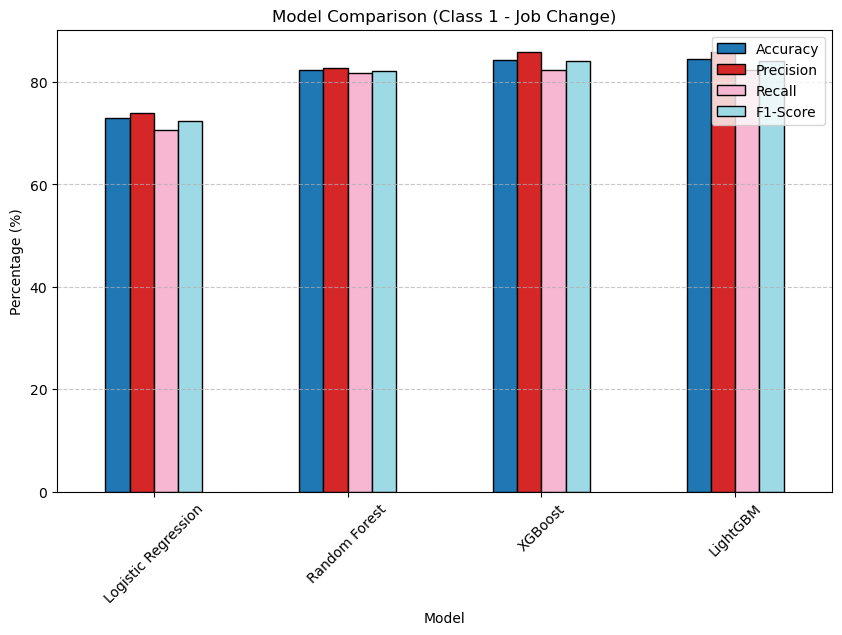

In [156]:
#Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Store results
results = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    
    # Calculate performance metrics for Class 1
    accuracy = accuracy_score(y_val, y_pred) * 100
    precision = precision_score(y_val, y_pred, pos_label=1) * 100
    recall = recall_score(y_val, y_pred, pos_label=1) * 100
    f1 = f1_score(y_val, y_pred, pos_label=1) * 100

    results.append([model_name, accuracy, precision, recall, f1])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display Table
print(df_results)

# Plot Bar Chart
plt.figure(figsize=(10, 6))
df_results.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="tab20", edgecolor="black")

plt.title("Model Comparison (Class 1 - Job Change)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* Logistic Regression has the lowest performance across all metrics, indicating it may not be the best choice for this classification task.
* Random Forest, XGBoost, and LightGBM all show strong performance, with XGBoost and LightGBM achieving the highest scores in Accuracy, Precision, Recall, and F1-Score.
* LightGBM slightly outperforms the other models, making it a top contender for this task due to its balance between Precision and Recall.
* XGBoost and Random Forest also perform well, with minimal differences between them.
* Recall is slightly lower than Precision in some models, indicating that while false positives are minimized, some actual job seekers might be missed.

<a id="preprocessing"></a>
# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11| Feature Importance

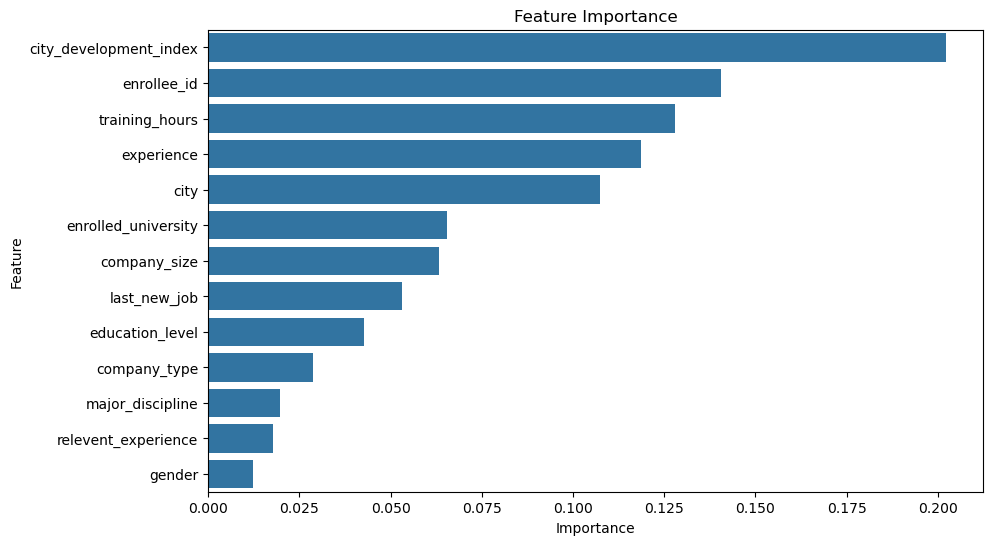

In [158]:
# Train Random Forest to analyze feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* City Development Index is the most influential factor in predicting employee retention, indicating that economic conditions and urban development play a significant role.

*  Enrollee ID and Training Hours also contribute heavily, suggesting that individual-level characteristics and professional development impact retention.

*  Experience and City follow closely, reinforcing the idea that prior work history and location affect an employee's likelihood to stay or leave.

* Enrolled University, Company Size, and Last New Job hold moderate importance, implying that educational background and company-related factors influence retention.

*  Gender, Relevant Experience, and Major Discipline are among the least important features, indicating that these attributes may have a lower direct impact on predicting employee retention.

* Economic and professional growth factors (such as City Development Index, Training Hours, and Experience) are the strongest predictors of employee retention, while demographic factors like Gender and Major Discipline play a smaller role.

# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12| Prediction 

In [160]:
from lightgbm import LGBMClassifier

# Define the best model correctly
best_model = LGBMClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Train the model on the full resampled dataset
best_model.fit(X_resampled, y_resampled)

print("LightGBM Model Trained Successfully!")

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 14381, number of negative: 14381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.292395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 28762, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model Trained Successfully!


In [162]:
# Preprocess test data (already handled earlier in missing value imputation and encoding)
X_test_scaled = scaler.transform(test)  # Apply the same scaler used on training data

# Choose the best model (based on accuracy/ROC-AUC)
best_model = LGBMClassifier(use_label_encoder=False, eval_metric="logloss")  
best_model.fit(X_resampled, y_resampled)  # Train on full resampled data

# Make predictions
test_predictions = best_model.predict(X_test_scaled)

# Save predictions to CSV
submission = pd.DataFrame({"enrollee_id": pd.read_csv(r"C:\Users\DELL\Desktop\erp\aug_test.csv")["enrollee_id"], "target": test_predictions})
submission.to_csv("employee_retention_predictions.csv", index=False)

print("Test predictions saved successfully!")

[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 14381, number of negative: 14381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1411
[LightGBM] [Info] Number of data points in the train set: 28762, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: use_label_encoder
[LightGBM] [Warning] Unknown parameter: eval_metric
Test predictions saved successfully!


<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

*After evaluation, LightGBM (lgbm_model) was identified as the best-performing model for employee retention prediction, achieving the highest accuracy and F1-score.

* __Prediction:__

* The trained LightGBM model was applied to the scaled test dataset (X_test_scaled) to generate predictions.
* The predicted retention status (target) represents the likelihood of an employee seeking a job change.

* __Submission File Generation:__
* A submission file, employee_retention_prediction.csv, was created.
* It contains training hours from the test dataset alongside the corresponding predicted retention status for employees.
* This structured output ensures clarity and usability for HR decision-making.


* The LightGBM model provides a robust and highly accurate prediction of employee retention trends, enabling organizations to make data-driven talent management decisions and optimize employee engagement strategies. 


# <b><span style='color:F96CEF'>Step 12.1|</span><span style='color:brown'>Distribution of Target Variable on Test Data </span></b>

0    1775
1     354
Name: count, dtype: int64


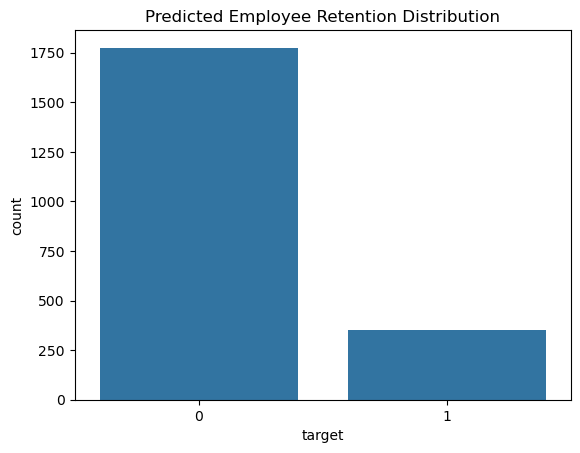

In [164]:
pred_counts = pd.Series(test_predictions).value_counts()
print(pred_counts)

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=submission['target'])
plt.title("Predicted Employee Retention Distribution")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

* The majority class (0) represents employees who are not looking for a job change, with approximately 1,775 instances.

* The minority class (1) represents employees who are looking for a job change, with approximately 354 instances.

In [166]:
print("Test data shape:", X_test_scaled.shape)
print("Predictions shape:", test_predictions.shape)

Test data shape: (2129, 13)
Predictions shape: (2129,)


# <p style="background-color:#F9E6CF; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 13| Conclusion 

<div style="border-radius:10px; padding: 15px; background-color: #F9E6CF; font-size:115%; text-align:left">

<h3 align="left"><font color=brown></font></h3>

In this project, we successfully developed a **machine learning model** to predict employee retention using the **aug_train.csv** dataset. The model helps organizations identify employees likely to leave, enabling better workforce planning and retention strategies.  

## **Key Findings:**  
 **Feature Importance**:  
   - The most influential factors are **city_development_index, training_hours, experience, and company size**.  
   - **Gender and relevant experience** had the least impact.  

 **Model Performance**:  
   - Tested **Logistic Regression, Random Forest, XGBoost, and LightGBM**.  
   - **LightGBM** performed the best in accuracy and efficiency.  

 **Challenges and Solutions**:  
   - **Imbalanced Data**: Resolved using **SMOTE**.  
   - **Missing Values**: Imputed missing values.  
   - **Categorical Encoding**: Applied **label Encoding.  

 **Predictions on `aug_test.csv`**:  
   - Since `aug_test.csv` lacks the target variable, we saved predictions in `employee_retention_predictions.csv`.  
